# Analysis of persons (from links in article text)

In [115]:
import pandas as pd
import json
import seaborn as sns
%pylab inline

#load about_pages
about_pages=pd.read_csv('de/all_data_bias_labour_gender_all_persons.csv',sep='\t', encoding='utf-8',index_col=0)#885
df=about_pages
df.male_amount.fillna(0, inplace=True)
df.female_amount.fillna(0, inplace=True)
df.rename(columns={"male_person_amount":"male_links","female_person_amount":"female_links",
                    "male_amount":"male_polyglot","female_amount":"female_polyglot"},inplace=True)
df.describe()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


,male_links,female_links,female_polyglot,male_polyglot,male_all_amount,female_all_amount
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000
mean,3.033898,0.392090,0.874576,4.009040,4.848588,0.926554
std,12.024531,2.585406,3.557714,11.785696,14.342202,3.890211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,3.000000,3.000000,0.000000
max,161.000000,61.000000,70.000000,175.000000,186.000000,78.000000


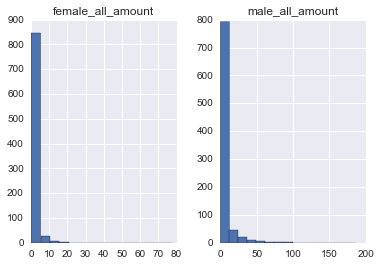

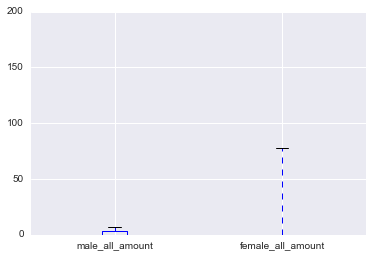

In [116]:
df.hist(bins=15,column=["male_all_amount","female_all_amount"])
plt.show()
plt.show(df.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"]))

# Remove data where there is no persons at all

In [117]:
#Remove data where there is no male person neither female  simultaneously
df_0=df[(df.male_all_amount==0)& (df.female_all_amount==0)]#474
df=df[(df.male_all_amount>0)| (df.female_all_amount>0)]#411
print "There are ",len(df),"profesions with at least one person"
df.describe()

There are  411 profesions with at least one person


,male_links,female_links,female_polyglot,male_polyglot,male_all_amount,female_all_amount
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,6.532847,0.844282,1.883212,8.632603,10.440389,1.995134
std,16.995143,3.745578,5.038485,16.108286,19.621000,5.522016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000
75%,5.000000,0.000000,2.000000,9.000000,11.000000,2.000000
max,161.000000,61.000000,70.000000,175.000000,186.000000,78.000000


In [118]:
df.loc[:,'f_m_all_amount'] = df['male_all_amount']+ df['female_all_amount']
df.describe()

C:\Anaconda\lib\site-packages\pandas\core\indexing.py:266: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


,male_links,female_links,female_polyglot,male_polyglot,male_all_amount,female_all_amount,f_m_all_amount
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,6.532847,0.844282,1.883212,8.632603,10.440389,1.995134,12.435523
std,16.995143,3.745578,5.038485,16.108286,19.621000,5.522016,22.092767
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000,5.000000
75%,5.000000,0.000000,2.000000,9.000000,11.000000,2.000000,12.000000
max,161.000000,61.000000,70.000000,175.000000,186.000000,78.000000,194.000000


{0: 199, 1: 93, 2: 31, 3: 29, 4: 13, 5: 7, 6: 9, 7: 6, 8: 7, 9: 1, 10: 5, 11: 1, 13: 2, 14: 2, 15: 1, 16: 1, 18: 1, 78: 1, 41: 1, 47: 1}
{0: 18, 1: 103, 2: 55, 3: 33, 4: 15, 5: 30, 6: 19, 7: 15, 8: 10, 9: 3, 10: 5, 11: 5, 12: 7, 13: 7, 14: 6, 15: 3, 16: 3, 17: 4, 18: 3, 19: 4, 20: 4, 21: 4, 22: 5, 23: 4, 25: 2, 26: 2, 29: 4, 30: 2, 31: 1, 32: 1, 33: 2, 34: 1, 35: 4, 36: 1, 37: 1, 38: 1, 39: 2, 40: 1, 41: 1, 43: 1, 45: 1, 46: 1, 157: 1, 48: 1, 52: 1, 53: 2, 137: 1, 56: 1, 57: 1, 186: 1, 61: 1, 69: 1, 71: 1, 76: 1, 86: 1, 90: 1, 91: 1, 94: 1}
{1: 98, 2: 52, 3: 35, 4: 16, 5: 26, 6: 20, 7: 16, 8: 15, 9: 10, 10: 8, 11: 7, 12: 7, 13: 5, 14: 4, 15: 3, 16: 4, 17: 2, 18: 3, 19: 3, 20: 7, 21: 4, 22: 5, 23: 3, 24: 4, 25: 2, 26: 1, 27: 1, 28: 2, 29: 2, 30: 2, 31: 1, 32: 2, 35: 3, 36: 3, 37: 2, 38: 2, 39: 1, 40: 4, 43: 1, 48: 2, 52: 2, 54: 1, 58: 2, 59: 2, 60: 1, 66: 2, 194: 1, 74: 1, 76: 1, 77: 1, 81: 1, 90: 1, 91: 1, 95: 2, 165: 1, 98: 1, 117: 1, 143: 1}


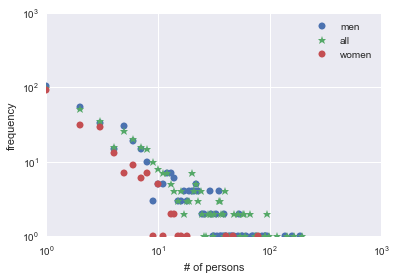

In [261]:
from itertools import groupby
freq_f = {key:len(list(group)) for key, group in groupby(np.sort(df.female_all_amount.values))}
print freq_f
freq_m = {key:len(list(group)) for key, group in groupby(np.sort(df.male_all_amount.values))}
print freq_m
freq_all = {key:len(list(group)) for key, group in groupby(np.sort(df.f_m_all_amount.values))}
print freq_all
df_fr = pd.DataFrame(data={'x': freq_m.keys(), 'men': freq_m.values()})
df_fr_f = pd.DataFrame(data={'x': freq_f.keys(), 'women': freq_f.values()})
df_fr_all = pd.DataFrame(data={'x': freq_all.keys(), 'all': freq_all.values()})
f, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
plt.plot(df_fr.x,df_fr.men,"o")

plt.plot(df_fr_all.x,df_fr_all['all'],marker="*",markersize=9,linestyle = '')
plt.plot(df_fr_f.x,df_fr_f.women,"o")
plt.xlabel("# of persons")
plt.ylabel("frequency")
plt.legend()
plt.show()

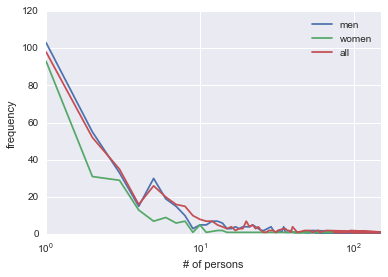

In [259]:
plt.plot(df_fr.x,df_fr.men,label="men")
plt.plot(df_fr_f.x,df_fr_f.women,label="women")
plt.plot(df_fr_all.x,df_fr_all["all"],label="all")
plt.xlim(1,150)
plt.ylim(0,120)
plt.xscale("log")
plt.xlabel("# of persons")
plt.ylabel("frequency")
plt.legend()
plt.show()

In [182]:
#ax = sns.countplot(x="female_all_amount", data=df,order=df.female_all_amount.values.sort())
#ax = sns.countplot(x="male_all_amount", data=df,order=df.male_all_amount.values.sort())

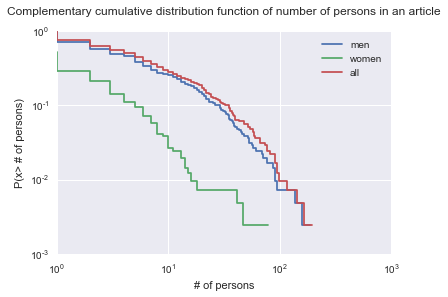

In [224]:
pyplot.xlabel('# of persons')
pyplot.ylabel('P(x> # of persons)')
pyplot.title('Complementary cumulative distribution function of number of persons in an article\n')

data_sorted = np.sort(df.male_all_amount.values)
# calculate the proportional values of samples
p = 1-1. * np.arange(len(df.male_all_amount.values)) / (len(df.male_all_amount.values) )
plt.loglog(data_sorted, p,drawstyle='steps',label="men")
data_sorted_f = np.sort(df.female_all_amount.values)
p_f = 1-1. * np.arange(len(df.female_all_amount.values)) / (len(df.female_all_amount.values))
plt.loglog(data_sorted_f, p_f,drawstyle='steps',label="women")
data_sorted_all = np.sort(df.f_m_all_amount.values)
p_all = 1-1. * np.arange(len(df.f_m_all_amount.values)) / (len(df.f_m_all_amount.values) )
plt.loglog(data_sorted_all, p_all,drawstyle='steps',label="all")
plt.legend()
plt.show()

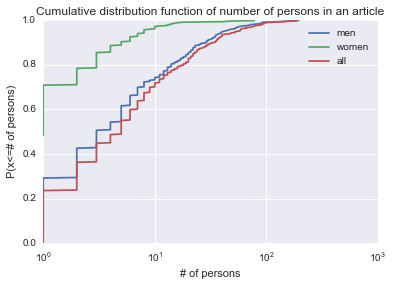

In [358]:
pyplot.xlabel('# of persons')
pyplot.ylabel('P(x<=# of persons)')
pyplot.title('Cumulative distribution function of number of persons in an article')

data_sorted = np.sort(df.male_all_amount.values)
# calculate the proportional values of samples
p = 1. * np.arange(len(df.male_all_amount.values)) / (len(df.male_all_amount.values) )
plt.plot(data_sorted, p,label="men")#,drawstyle='steps')
#plt.loglog(data_sorted, p,drawstyle='steps',label="men")
plt.xscale("log")
data_sorted_f = np.sort(df.female_all_amount.values)
p_f = 1. * np.arange(len(df.female_all_amount.values)) / (len(df.female_all_amount.values) )
plt.plot(data_sorted_f, p_f,label="women")#,drawstyle='steps')
data_sorted_all = np.sort(df.f_m_all_amount.values)
p_all = 1. * np.arange(len(df.f_m_all_amount.values)) / (len(df.f_m_all_amount.values))
plt.plot(data_sorted_all, p_all,label="all")#,drawstyle='steps')
plt.legend()
plt.ylim(0)
plt.show()

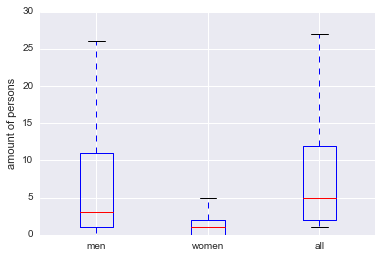

Mean of male person ratio:  0.827957377247


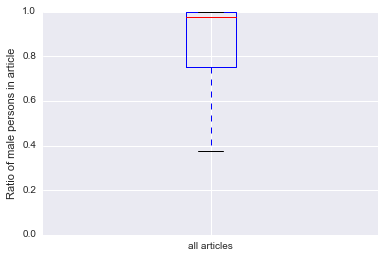

In [217]:
g=df.boxplot(return_type='axes',column=["male_all_amount","female_all_amount","f_m_all_amount"])
plt.ylim(0,30)
plt.xticks([1,2,3],["men","women","all"])
plt.ylabel("amount of persons")
plt.show()

df.loc[:,"m_normalized"]=df.apply(lambda x:float(x["male_all_amount"])/float(x["male_all_amount"]+x["female_all_amount"]),axis=1)
print "Mean of male person ratio: ",df.m_normalized.mean()
g=df.boxplot(column="m_normalized", return_type="axes")
plt.xticks([1],["all articles"])
plt.ylabel("Ratio of male persons in article")
plt.show()


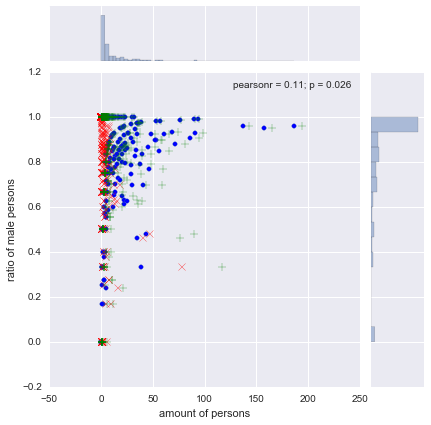

In [306]:
graph=sns.jointplot(x="male_all_amount",c='b',  y="m_normalized", data=df)
graph.x = df.female_all_amount
graph.y = df.m_normalized
graph.plot_joint(plt.scatter, marker='x', c='r', s=50)
#graph.plot_marginals(sns.distplot, kde=False, color="r")
graph.x = df.f_m_all_amount
graph.y = df.m_normalized
graph.plot_joint(plt.scatter, marker='+', c='g', s=50)
#graph.plot_marginals(sns.distplot, kde=False, color="g")
graph.set_axis_labels(xlabel='amount of persons', ylabel='ratio of male persons')

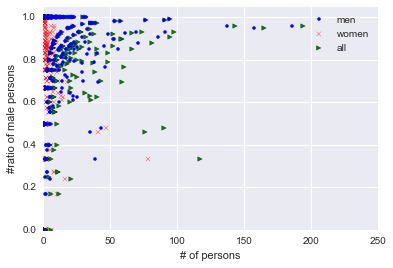

In [360]:
plt.plot(df.male_all_amount.values, df.m_normalized.values,".",c="b",label="men")
plt.scatter(df.female_all_amount.values, df.m_normalized.values,c="r",marker='x',label="women")#,markersize=9
plt.scatter(df.f_m_all_amount.values, df.m_normalized.values,c="g",marker='>',label="all")
plt.ylim(0,1.05)
plt.xlim(0)
plt.xlabel("# of persons")
plt.ylabel("#ratio of male persons")
plt.legend()
plt.show()

(0, 40)

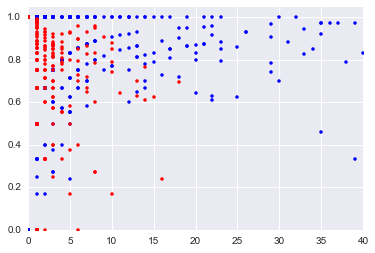

In [166]:
plt.plot(df.male_all_amount.values, df.m_normalized.values,".",c="b")
plt.plot(df.female_all_amount.values, df.m_normalized.values,".",c="r")
#plt.plot(df.f_m_all_amount.values, df.m_normalized.values,".",c="g")
plt.ylim(0,1.05)
plt.xlim(0,40)

(0, 1.05)

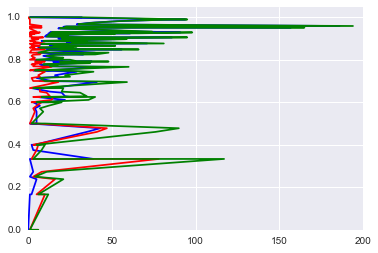

In [361]:
df2=df.sort_values(['m_normalized','male_all_amount'], ascending=[False,False])
plt.plot(df2.male_all_amount.values, df2.m_normalized.values,c="b")
df2=df.sort_values(['m_normalized','female_all_amount'], ascending=[True,False])
plt.plot(df2.female_all_amount.values, df2.m_normalized.values,c="r")#,".")

df2=df.sort_values(['m_normalized','f_m_all_amount'], ascending=[True,False])
plt.plot(df2.f_m_all_amount.values, df2.m_normalized.values,c="g")
plt.ylim(0,1.05)

(0, 1.05)

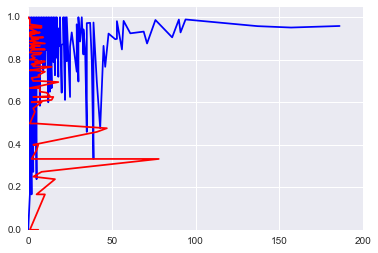

In [159]:
df2=df.sort_values(['male_all_amount','m_normalized'], ascending=[True,True])
plt.plot(df2.male_all_amount.values, df2.m_normalized.values,c="b")
df2=df.sort_values(['m_normalized','female_all_amount'], ascending=[True,False])
plt.plot(df2.female_all_amount.values, df2.m_normalized.values,c="r")#,".")
#plt.plot(df2.f_m_all_amount.values, df2.m_normalized.values,".")
plt.ylim(0,1.05)

(0, 1.2)

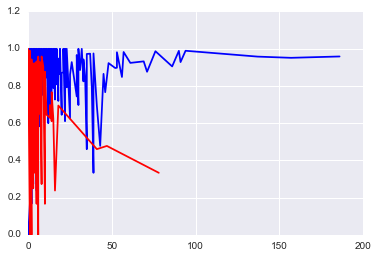

In [170]:
df2=df.sort_values(['male_all_amount','m_normalized'], ascending=[True,True])
plt.plot(df2.male_all_amount.values, df2.m_normalized.values,c="b")
df2=df.sort_values(['female_all_amount','m_normalized'], ascending=[True,True])
plt.plot(df2.female_all_amount.values, df2.m_normalized.values,c="r")
plt.ylim(0,1.05)

(0, 1.05)

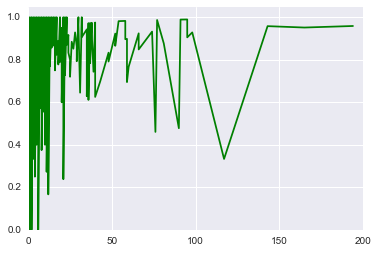

In [176]:
df2=df.sort_values(['f_m_all_amount','m_normalized'], ascending=[True,False])
plt.plot(df2.f_m_all_amount.values, df2.m_normalized.values,c="g")
plt.ylim(0,1.05)

### Group by redirection bias

Bias
female       2
male       371
neutral     38
dtype: int64
Median: 
female     0.230263
male       0.989011
neutral    0.834821
Name: m_normalized, dtype: float64


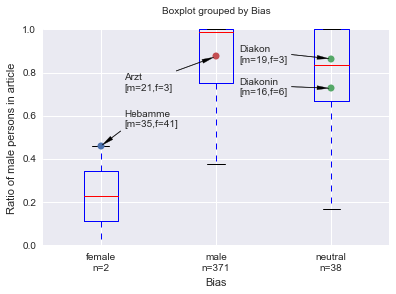

In [352]:
#data=pd.read_csv("de/wiki/all_wiki_pages.csv",sep='\t', encoding='utf-8',index_col=0) 
#df["Bias"]=df.apply(lambda x: data[data.WikiName.isin([x.name])].Bias.values[0], axis =1)
print df.groupby("Bias").size()
medians=df.groupby("Bias").m_normalized.median()
medians.keys().rename("",inplace=True)
print "Median:", medians
df.boxplot(by='Bias',column="m_normalized",bootstrap=200000, return_type="axes")#notch=True
plt.ylabel("Ratio of male persons in article")
plt.title("")
plt.ylim(0,1)
plt.plot([1],[df.loc["Hebamme","m_normalized"]], 'o')
plt.annotate('Hebamme\n[m=35,f=41]', xy=(1, 0.46), xytext=(1.2, 0.55),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([3,3],[df.loc["Diakon","m_normalized"],df.loc["Diakonin","m_normalized"]], 'o') 
plt.annotate('Diakon\n[m=19,f=3]', xy=(3, df.loc["Diakon","m_normalized"]), xytext=(2.2, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.annotate('Diakonin\n[m=16,f=6]', xy=(3, df.loc["Diakonin","m_normalized"]), xytext=(2.2, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.plot([2],[df.loc["Arzt","m_normalized"]], 'o') 
plt.annotate('Arzt\n[m=21,f=3]', xy=(2, df.loc["Arzt","m_normalized"]), xytext=(1.2, 0.72),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.xticks(range(1,4),["female\nn=2","male\nn=371","neutral\nn=38"])
plt.show()

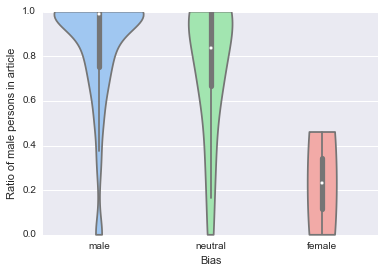

In [120]:
with sns.color_palette("pastel", 3):#Set2
    sns.violinplot(y="m_normalized",x="Bias",data=df,cut=0,inner="box")
    plt.ylim(0,1)
    plt.ylabel("Ratio of male persons in article")
    plt.show()

#Wilcoxon-Mann-Whitney Rank Sum Test

null hypothesis: two sets of measurements are drawn from the same distribution

the alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample. 

In [97]:
from scipy import stats  

m_val=df[df.Bias=="male"].m_normalized.values
f_val=df[df.Bias=="female"].m_normalized.values
n_val=df[df.Bias=="neutral"].m_normalized.values
p_all=[]
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(m_val, n_val)   
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(n_val,f_val)   
print "MWW RankSum P for neutral and female distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
names_c=["male bias professions & female bias professions","male bias professions & nuetral professions",
         "neutral professions & female bias professions"]
#all_together=list(m_val)+ list(f_val)+ list(n_val)
#z_stat, p_val = stats.ranksums(all_together, m_val)  
#print "MWW RankSum P for all together and male distributions =", p_val ,"z_stat=",z_stat
#z_stat, p_val = stats.ranksums(all_together, f_val)  
#print "MWW RankSum P for all together and female distributions =", p_val  , "z_stat=",z_stat
#z_stat, p_val = stats.ranksums(all_together, n_val)  
#print "MWW RankSum P for all together and neutral distributions =", p_val  , "z_stat=",z_stat

from statsmodels.sandbox.stats.multicomp import multipletests

print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "================ pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

MWW RankSum P for male and female distributions = 0.0278333881087 z_stat= 2.19962674404
MWW RankSum P for male and neutral distributions = 0.0797603410988 z_stat= 1.75207832297
MWW RankSum P for neutral and female distributions = 0.054383172481 z_stat= 1.9237719688
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
================ pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male bias professions & female bias professions    False   7.98e-02
male bias professions & nuetral professions        False   7.98e-02
neutral professions & female bias professions      False   7.98e-02


In [98]:
p_all=[]
print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, f_val)
p_all.append(p_val)
print stats.ks_2samp(m_val, n_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, n_val)
p_all.append(p_val)
print stats.ks_2samp(n_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(n_val, f_val)
p_all.append(p_val)
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]

from statsmodels.sandbox.stats.multicomp import multipletests

print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

Ks_2sampResult(statistic=0.92183288409703501, pvalue=0.024635779823533321)
Ks_2sampResult(statistic=0.19605617818130228, pvalue=0.12447089250670175)
Ks_2sampResult(statistic=0.84210526315789469, pvalue=0.058457910412402385)
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions              False   7.39e-02
male professions & nuetral professions             False   1.24e-01
neutral professions & female professions           False   8.77e-02


In [99]:
#WMW two-sided 
p_all=[]
p_all.append(wmw(m_val,f_val)[2])
p_all.append(wmw(m_val,n_val)[2])
p_all.append(wmw(n_val,f_val)[2])
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

2.34167766553 705.5 0.0191972865815
1.86217656331 8265.0 0.0625782068116
1.94672546966 69.0 0.0515676564093
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions              False   5.76e-02
male professions & nuetral professions             False   6.26e-02
neutral professions & female professions           False   6.26e-02


# Wilcoxon-Mann-Whitney Rank Sum Test
| | p-val_old | z | p_val_corr | reject |
| :-|:-:|:-:|:-:|:-:|
| male bias professions & female bias professions|    0.027   |   2.19   | 7.98e-02 | False |
| male bias professions & nuetral professions   |    0.079    |   1.75   | 7.98e-02 | False |
| female bias professions & neutral professions |    0.054    |   1.92   | 7.98e-02 | False|

| all_together & male bias professions |     0.623    |     -0.49    | 
| all_together & female bias professions |     0.029    |     2.17    | 
| all_together & neutral professions |     0.121    |     1.54    | 

### Group by gender of profession label

prof_gender
female      11
male       376
neutral     24
dtype: int64
Median: 
female     0.666667
male       0.988012
neutral    0.834821
Name: m_normalized, dtype: float64


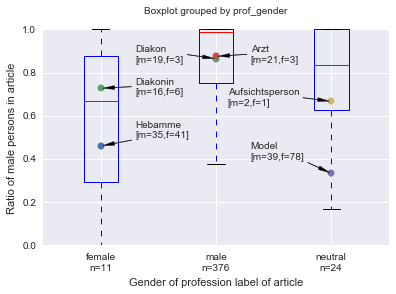

In [373]:
print df.groupby("prof_gender").size()
medians=df.groupby("prof_gender").m_normalized.median()
medians.keys().rename("",inplace=True)
print "Median:", medians
g=df.boxplot(column="m_normalized",by="prof_gender",return_type='axes')#showmeans=True,ntch=True
plt.title("")
plt.ylabel("Ratio of male persons in article")
plt.xlabel("Gender of profession label of article")
plt.plot([1],[df.loc["Hebamme","m_normalized"]], 'o') 
plt.annotate('Hebamme\n[m=35,f=41]', xy=(1, 0.46), xytext=(1.3, 0.5),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([2,1],[df.loc["Diakon","m_normalized"],df.loc["Diakonin","m_normalized"]], 'o') 
plt.annotate('Diakon\n[m=19,f=3]', xy=(2, df.loc["Diakon","m_normalized"]), xytext=(1.3, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.annotate('Diakonin\n[m=16,f=6]', xy=(1, df.loc["Diakonin","m_normalized"]), xytext=(1.3, 0.7),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))#16,6
plt.plot([2],[df.loc["Arzt","m_normalized"]], 'o') 
plt.annotate('Arzt\n[m=21,f=3]', xy=(2, df.loc["Arzt","m_normalized"]), xytext=(2.3, 0.85),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([3],[df.loc["Model","m_normalized"]], 'o') 
plt.annotate('Model\n[m=39,f=78]', xy=(3, df.loc["Model","m_normalized"]), xytext=(2.3, 0.4),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.plot([3],[df.loc["Aufsichtsperson","m_normalized"]], 'o') 
plt.annotate('Aufsichtsperson\n[m=2,f=1]', xy=(3, df.loc["Aufsichtsperson","m_normalized"]), xytext=(2.1, 0.65),
             arrowprops=dict(width=0.5,shrink=0.05,headwidth=4,facecolor='black'))
plt.xticks(range(1,4),["female\nn=11","male\nn=376","neutral\nn=24"])
plt.show()

C:\Anaconda\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


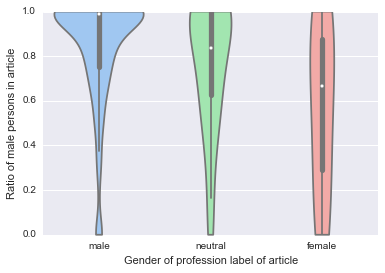

In [54]:
with sns.color_palette("pastel", 3):#Set2
    sns.violinplot(y="m_normalized",x="prof_gender",data=df,cut=0,inner="box"),
    plt.ylim(0,1)
    plt.ylabel("Ratio of male persons in article")
    plt.xlabel("Gender of profession label of article")
    plt.show()

In [90]:
from scipy import stats  

m_val=df[df.prof_gender=="male"].m_normalized.values
f_val=df[df.prof_gender=="female"].m_normalized.values
n_val=df[df.prof_gender=="neutral"].m_normalized.values
p_all=[]
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(m_val, n_val)   
print "MWW RankSum P for male and neutral distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
z_stat, p_val = stats.ranksums(n_val, f_val)   
print "MWW RankSum P for female and neutral distributions =", p_val , "z_stat=",z_stat
p_all.append(p_val)
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]

from statsmodels.sandbox.stats.multicomp import multipletests

print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

#all_together=list(m_val)+ list(f_val)+ list(n_val)
#z_stat, p_val = stats.ranksums(all_together, m_val)  
#print "MWW RankSum P for all together and male distributions =", p_val ,"z_stat=",z_stat
#z_stat, p_val = stats.ranksums(all_together, f_val)  
#print "MWW RankSum P for all together and female distributions =", p_val  , "z_stat=",z_stat
#z_stat, p_val = stats.ranksums(all_together, n_val)  
#print "MWW RankSum P for all together and neutral distributions =", p_val  , "z_stat=",z_stat

MWW RankSum P for male and female distributions = 0.0137464452259 z_stat= 2.46382175804
MWW RankSum P for male and neutral distributions = 0.195718220482 z_stat= 1.29384715635
MWW RankSum P for female and neutral distributions = 0.150120822242 z_stat= 1.4391048354
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions               True   2.75e-02
male professions & nuetral professions             False   1.30e-01
neutral professions & female professions           False   1.30e-01


In [91]:
p_all=[]
print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, f_val)
p_all.append(p_val)
print stats.ks_2samp(m_val, n_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(m_val, n_val)
p_all.append(p_val)
print stats.ks_2samp(n_val, f_val)#Kolmogorov-Smirnov statistic
z_stat, p_val = stats.ks_2samp(n_val, f_val)
p_all.append(p_val)
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

Ks_2sampResult(statistic=0.4719535783365571, pvalue=0.010825001414974974)
Ks_2sampResult(statistic=0.19414893617021278, pvalue=0.32754619434475996)
Ks_2sampResult(statistic=0.32954545454545453, pvalue=0.31798377545626783)
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions               True   2.17e-02
male professions & nuetral professions             False   2.18e-01
neutral professions & female professions           False   2.18e-01


In [92]:
####wromg values!! (it is one-sided implementation)
import scipy as sc
print sc.__version__
print stats.mannwhitneyu(m_val, f_val)#,alternative='two-sided')

0.16.0
MannwhitneyuResult(statistic=1167.0, pvalue=0.004394681527867348)


In [79]:
print stats.kruskal(m_val, f_val, n_val)
print stats.combine_pvalues(p_all, method='fisher')#Fisher's method (also known as Fisher's combined probability test)

KruskalResult(statistic=8.4922090113144755, pvalue=0.01431990852115936)
(15.628738299161324, 0.015891660428074449)


In [85]:
from scipy.stats._rank import rankdata, tiecorrect
from scipy.stats import distributions
def wmw(x,y,use_continuity=True,alternative ="two-sided"):
    x,y = map(np.asarray, (x, y))
    n1 = len(x)
    n2 = len(y)
    alldata = np.concatenate((x,y))
    ranked = stats._rank.rankdata(alldata)
    rankx = ranked[0:n1] 
    u1 = n1*n2 + (n1*(n1+1))/2.0 - np.sum(rankx, axis=0) 
    u2 = n1*n2 - u1 # remainder is U for
    T = tiecorrect(ranked)
    sd = np.sqrt(T * n1 * n2 * (n1+n2+1) / 12.0)
    meanrank = n1*n2/2.0 + 0.5 * use_continuity
    if alternative == 'less':
            z = u1 - meanrank
    elif alternative == 'greater':
            z = u2 - meanrank
    elif alternative == 'two-sided':
            bigu = max(u1, u2)
            z = np.abs(bigu - meanrank)

    else:
            raise ValueError("alternative should be 'less', 'greater'"
                             "or 'two-sided'")

    z = z / sd

    print z,u2, distributions.norm.sf(z) * 2
    return z,u2,distributions.norm.sf(z) * 2
p_all=[]
p_all.append(wmw(m_val,f_val)[2])
p_all.append(wmw(m_val,n_val)[2])
p_all.append(wmw(n_val,f_val)[2])
names_c=["male professions & female professions","male professions & nuetral professions",
         "neutral professions & female professions"]
print "Two stage FDR correction of Benjamini-Hochberg:"
res=multipletests(p_all, alpha=0.05, method='fdr_tsbh')
print "-"*75
print "=============== pair of comparison =============== reject == p_val_corrected"
print "-"*75
for i in range(0,len(p_all)):
    print "{:<47}    {!r:>5}   {:<3.2e}".format(names_c[i],res[0][i],res[1][i])

2969.0 0.00878936305573
5222.5 0.168619710413
172.5 0.143967926958
Two stage FDR correction of Benjamini-Hochberg:
---------------------------------------------------------------------------
=============== pair of comparison =============== reject == p_val_corrected
---------------------------------------------------------------------------
male professions & female professions               True   1.76e-02
male professions & nuetral professions             False   1.12e-01
neutral professions & female professions           False   1.12e-01


## Wilcoxon-Mann-Whitney Rank Sum Test
| | p-val_old | z | p_val_corr | reject |
| :-|:-:|:-:|:-:|:-:|
| male professions & female professions    |    0.013     |   2.46    | 2.75e-02 | True  |
| male professions & nuetral professions   |    0.195     |   1.29    | 1.30e-01 | False |
| female professions & neutral professions |     0.15     |   1.43    | 1.30e-01 | False |
###
| all_together & male profession |     0.612    |     -0.50    | 
| all_together & female profession |     0.018    |     2.35    | 
| all_together & neutral profession |     0.263    |     1.11    | 

### Group by Labor market

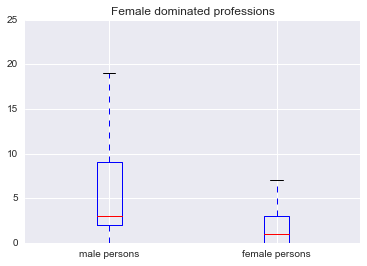

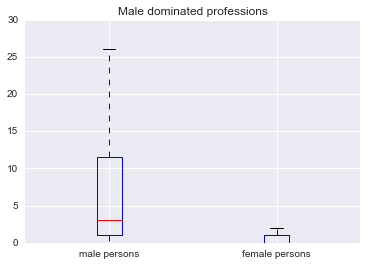

In [47]:
female_most_people=df[df.labor_market_domin=="female"]
male_most_people=df[df.labor_market_domin=="male"]

g=female_most_people.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,25)
plt.xticks([1,2],["male persons","female persons"])
plt.title("Female dominated professions")
plt.show()

g=male_most_people.boxplot(return_type='axes',column=["male_all_amount","female_all_amount"])
plt.ylim(0,30)
plt.xticks([1,2],["male persons","female persons"])
plt.title("Male dominated professions")
plt.show()

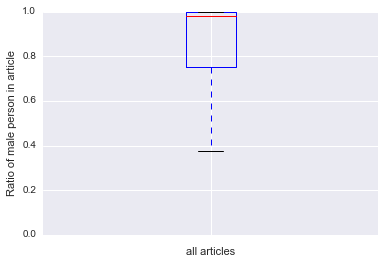

Ratio of male persons in all articles (mean): 0.827989756752


In [48]:
#only data where we have labour market statistics
df_all=df[~df.labor_market_domin.isnull()]

df_all.boxplot(column="m_normalized",return_type='axes')
plt.xlabel("all articles")
plt.xticks([1],"")
plt.ylabel("Ratio of male person in article")
plt.show()
print "Ratio of male persons in all articles (mean):",df_all.m_normalized.mean()

labor_market_domin
female    153
male      251
dtype: int64
Median: 
female    0.85
male      1.00
Name: m_normalized, dtype: float64
Ratio of male persons in articles about female dominated profesion(mean): 0.768219758851
Ratio of male persons in articles about male dominated profesion(mean): 0.864423261448


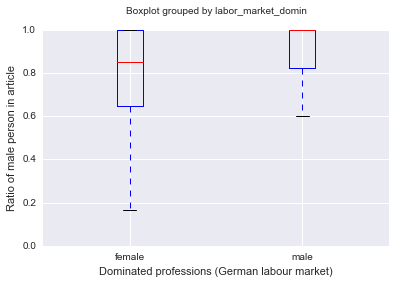

In [49]:
print df_all.groupby("labor_market_domin").size()
medians=df.groupby("labor_market_domin").m_normalized.median()
medians.keys().rename("",inplace=True)
print "Median:", medians
g_b_m=df_all.boxplot(column="m_normalized",return_type='axes',by="labor_market_domin")
plt.title("")#"ratio of men in artcles for professions where there are less than 50% female")
plt.xlabel("Dominated professions (German labour market)")
plt.ylabel("Ratio of male person in article")
print "Ratio of male persons in articles about female dominated profesion(mean):",df_all[df_all.labor_market_domin=="female"].m_normalized.mean()
print "Ratio of male persons in articles about male dominated profesion(mean):",df_all[df_all.labor_market_domin=="male"].m_normalized.mean()

[]

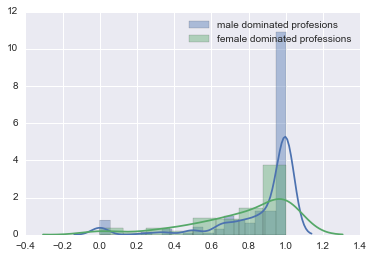

In [93]:
import seaborn as sns
m_val=df_all[df_all.labor_market_domin=="male"].m_normalized.values
f_val=df_all[df_all.labor_market_domin=="female"].m_normalized.values
g1=sns.distplot(m_val,label="male dominated profesions")
g2=sns.distplot(f_val,label="female dominated professions")
g2.legend()
#g2.set_xlim(0,1)
g2.plot()

In [94]:
from scipy import stats  
#(also called the Mann–Whitney–Wilcoxon (MWW), Wilcoxon rank-sum test, or Wilcoxon–Mann–Whitney test
z_stat, p_val = stats.ranksums(m_val, f_val)   
print "MWW RankSum P for male and female distributions =", p_val , "z_stat=",z_stat
#all_together=list(m_val)+ list(f_val)
#z_stat, p_val = stats.ranksums(all_together, m_val)  
#print "MWW RankSum P for all together and male distributions =", p_val ,"z_stat=",z_stat
#z_stat, p_val = stats.ranksums(all_together, f_val)  
#print "MWW RankSum P for all together and female distributions =", p_val  , "z_stat=",z_stat
#The Wilcoxon rank-sum test tests the null hypothesis that two sets of measurements are drawn from the same distribution.
#The alternative hypothesis is that values in one sample are more likely to be larger than the values in the other sample.

MWW RankSum P for male and female distributions = 2.65933602087e-05 z_stat= 4.20083393862


## Wilcoxon-Mann-Whitney Rank Sum Test
| | p-val | z |
| :-|:-:|:-:|
| male professions & female professions |    2.66e-05     |   4.20    | 
##
| all_together & female profession |     0.0422    |     -2.03    | 
| all_together & male profession |     0.0047    |     2.82    | 

In [100]:
print stats.ks_2samp(m_val, f_val)#Kolmogorov-Smirnov statistic

Ks_2sampResult(statistic=0.92183288409703501, pvalue=0.024635779823533321)


In [101]:
print stats.mannwhitneyu(m_val, f_val)#one-sided
# Mann-Whitney U test that is two-sided and has continuity cirrection (my implementation, also is right in scipy v0.17)
print wmw(m_val,f_val)

MannwhitneyuResult(statistic=36.5, pvalue=0.0095986432907258206)
2.34167766553 705.5 0.0191972865815
(2.3416776655268881, 705.5, 0.019197286581451641)


(Mann–Whitney U=23984.0, n1=251, n2=153, p=7.89e-06 p<0.05 two-tailed)
    
    A measure of the central tendencies of the two groups (means or medians)
    The value of U
    The sample sizes
    The significance level.


## Distribution visualisation

(0, 200.0)

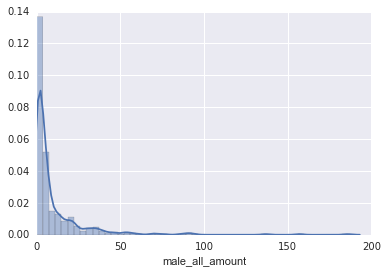

In [27]:
import seaborn as sns
#sns.set(color_codes=True)
g=sns.distplot(df.male_all_amount)
g.set_xlim(0,)

(0, 80.0)

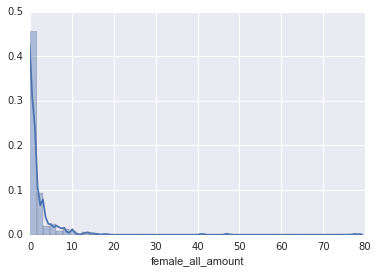

In [28]:
g=sns.distplot(df.female_all_amount)
g.set_xlim(0,)

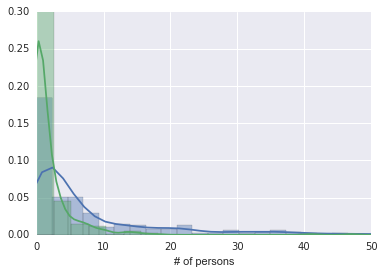

In [29]:
g1=sns.distplot(df.male_all_amount,bins=80)
g2=sns.distplot(df.female_all_amount,bins=30, kde_kws={"bw":1})
g1.set_xlim(0,50)
g1.set_ylim(0,0.3)
g1.set_xlabel("# of persons")

### Comulative distribution

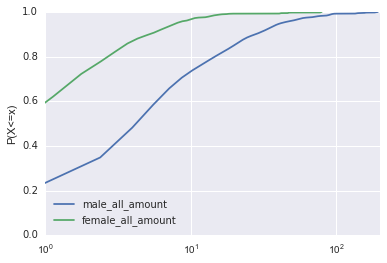

In [30]:
g=sns.kdeplot(df.male_all_amount,cumulative=True)#,linestyle="dotted")
g1=sns.kdeplot(df.female_all_amount,cumulative=True)
#g.set_ylim(1, 0)
g.set_xlim(1,)
g.set_xscale('log')
g.set_ylabel("P(X<=x)")

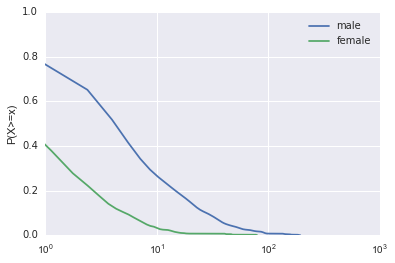

In [31]:
line = g.lines[0]
plt.plot(line.get_xdata(),1-line.get_ydata(), label="male")
line2=g.lines[1]
plt.plot(line2.get_xdata(),1-line2.get_ydata(), label="female")
plt.xscale("log")
plt.xlim(1,)
plt.legend()
plt.ylabel("P(X>=x)")

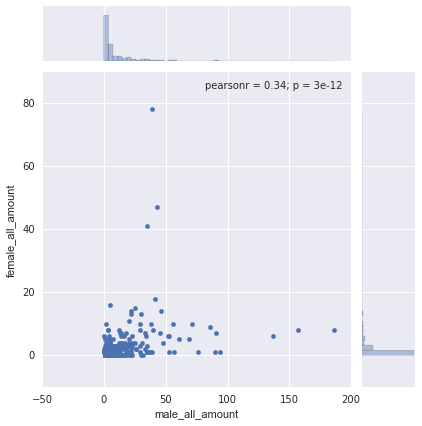

In [32]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount", data=df);

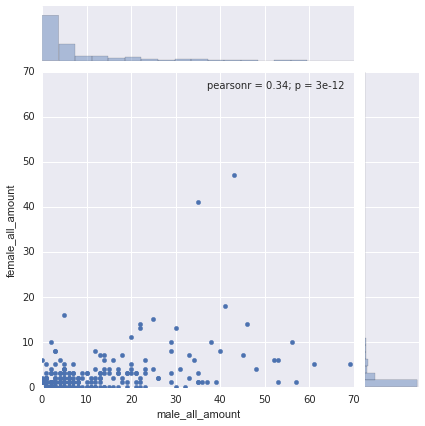

In [33]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, xlim=(0,70), ylim=(0,70))

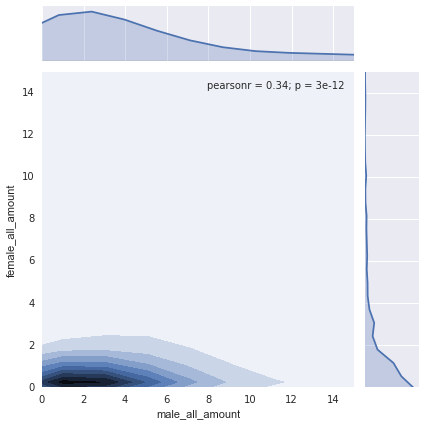

In [34]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, kind="kde",xlim=(0,15), ylim=(0,15))
#g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")

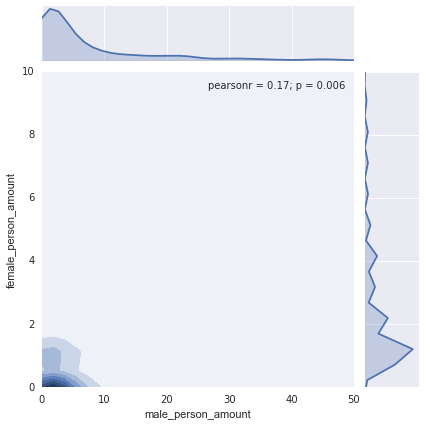

In [47]:
g=sns.jointplot(x="male_all_amount", y="female_all_amount",data=df, kind="kde",xlim=(0,50), ylim=(0,10))
#g.plot_joint(plt.scatter, c="black", s=30, linewidth=1, marker="+")

194


(0, 90.0)

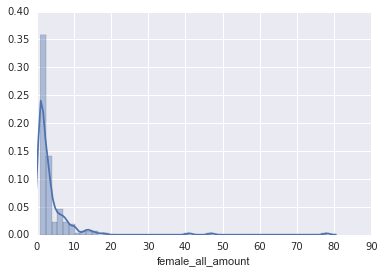

In [36]:
#del all where female zero
df3=df[(df.male_all_amount!=0) & (df.female_all_amount!=0)]#194
print len(df3)
g=sns.distplot(df3.female_all_amount)
g.set_xlim(0,)